# **Pandas Essentials for Data Analysis**

## **1. Importing Pandas and Dataset Overview**

In [1]:

# Import pandas and numpy (often used together)
import pandas as pd
import numpy as np

# Load a sample dataset (you can replace this with your dataset)
df = pd.DataFrame({
    'A': [1, 2, 3, 4, np.nan],
    'B': [5, np.nan, 6, 7, 8],
    'C': ['X', 'Y', 'Z', 'X', 'Y'],
    'Date': pd.date_range('20230101', periods=5)
})

# Display the first few rows
print("First five rows of the dataset:")
display(df.head())

# Overview of dataset
print("Dataset Info:")
df.info()

# Summary statistics
print("Summary statistics:")
display(df.describe())
    

First five rows of the dataset:


,A,B,C,Date
0,1.0,5.0,X,2023-01-01
1,2.0,NaN,Y,2023-01-02
2,3.0,6.0,Z,2023-01-03
3,4.0,7.0,X,2023-01-04
4,NaN,8.0,Y,2023-01-05


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      float64       
 2   C       5 non-null      object        
 3   Date    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 288.0+ bytes
Summary statistics:


,A,B,Date
count,4.000000,4.000000,5
mean,2.500000,6.500000,2023-01-03 00:00:00
min,1.000000,5.000000,2023-01-01 00:00:00
25%,1.750000,5.750000,2023-01-02 00:00:00
50%,2.500000,6.500000,2023-01-03 00:00:00
75%,3.250000,7.250000,2023-01-04 00:00:00
max,4.000000,8.000000,2023-01-05 00:00:00
std,1.290994,1.290994,NaN


## **2. Data Cleaning**

In [2]:

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values with the mean (or other strategy)
df['A'] = df['A'].fillna(df['A'].mean())

# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()

print("Cleaned Data:")
display(df)
    

Missing values:
A       1
B       1
C       0
Date    0
dtype: int64
Cleaned Data:


,A,B,C,Date
0,1.0,5.0,X,2023-01-01
1,2.0,NaN,Y,2023-01-02
2,3.0,6.0,Z,2023-01-03
3,4.0,7.0,X,2023-01-04
4,2.5,8.0,Y,2023-01-05


## **3. Filtering and Selecting Data**

In [3]:

# Selecting specific columns
selected_columns = df[['A', 'B']]

# Filtering rows based on a condition
filtered_df = df[df['A'] > 2]

# Using .loc and .iloc for selection
specific_rows = df.loc[0:3, ['A', 'C']]  # Label-based
specific_rows_idx = df.iloc[0:3, 0:2]  # Index-based

print("Filtered Data:")
display(filtered_df)
    

Filtered Data:


,A,B,C,Date
2,3.0,6.0,Z,2023-01-03
3,4.0,7.0,X,2023-01-04
4,2.5,8.0,Y,2023-01-05


## **4. Grouping and Aggregation**

In [4]:

# Group by a column and calculate summary statistics
grouped = df.groupby('C')['B'].mean()

# Multiple aggregations
agg_df = df.groupby('C').agg({
    'A': ['mean', 'max'],
    'B': ['sum']
})

print("Grouped Data:")
display(grouped)
print("Aggregated Data:")
display(agg_df)
    

Grouped Data:


C
X    6.0
Y    8.0
Z    6.0
Name: B, dtype: float64

Aggregated Data:


A          B
   mean  max   sum
C                 
X  2.50  4.0  12.0
Y  2.25  2.5   8.0
Z  3.00  3.0   6.0

## **5. Merging and Joining**

In [5]:

# Create another DataFrame for merging
df2 = pd.DataFrame({
    'C': ['X', 'Y', 'Z'],
    'D': [10, 20, 30]
})

# Merge two dataframes
merged_df = pd.merge(df, df2, on='C', how='inner')  # Join options: 'inner', 'outer', 'left', 'right'

print("Merged Data:")
display(merged_df)
    

Merged Data:


,A,B,C,Date,D
0,1.0,5.0,X,2023-01-01,10
1,2.0,NaN,Y,2023-01-02,20
2,3.0,6.0,Z,2023-01-03,30
3,4.0,7.0,X,2023-01-04,10
4,2.5,8.0,Y,2023-01-05,20


## **6. Reshaping Data**

In [6]:

# Pivot table
pivot_table = df.pivot_table(values='B', index='C', columns='Date', aggfunc='sum')

# Melting data
melted_df = pd.melt(df, id_vars=['C'], value_vars=['A', 'B'])

print("Pivot Table:")
display(pivot_table)
print("Melted Data:")
display(melted_df)
    

Pivot Table:


Date,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05
C,,,,,
X,5.0,NaN,NaN,7.0,NaN
Y,NaN,0.0,NaN,NaN,8.0
Z,NaN,NaN,6.0,NaN,NaN


Melted Data:


,C,variable,value
0,X,A,1.0
1,Y,A,2.0
2,Z,A,3.0
3,X,A,4.0
4,Y,A,2.5
5,X,B,5.0
6,Y,B,NaN
7,Z,B,6.0
8,X,B,7.0
9,Y,B,8.0


## **7. Time Series Analysis**

In [7]:

# Convert a column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set as index
df.set_index('Date', inplace=True)

# Resample data (e.g., monthly sum)
monthly_data = df.resample('M').sum()

print("Monthly Resampled Data:")
display(monthly_data)
    

Monthly Resampled Data:


C:\Users\Owner\AppData\Local\Temp\ipykernel_32568\1486670072.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


,A,B,C
Date,,,
2023-01-31,12.5,26.0,XYZXY


## **8. Visualization with Pandas**

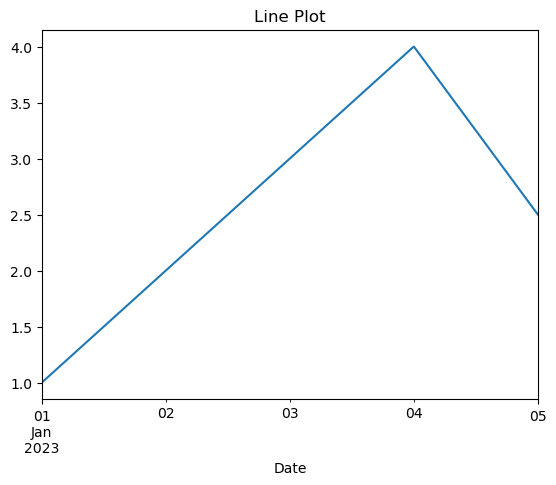

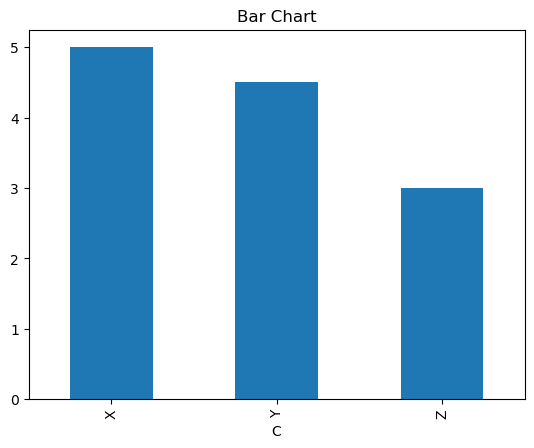

In [8]:

import matplotlib.pyplot as plt

# Simple plot
df['A'].plot(kind='line', title='Line Plot')
plt.show()

# Grouped bar chart
df.groupby('C')['A'].sum().plot(kind='bar', title='Bar Chart')
plt.show()
    